# Overview
This notebook is about building an artificial neural network to predict the hardness of the welding duplex stainless steel. All our codes are written in the notebook offered by google colab, a free cloud based service offered by Google. It provides us with an online GPU that helps run our codes without too much struggles. It is very handy to build deep learning models with librairies like Keras, TensorFlow, PyTorch and OpenCV. In this work, we mainly use Keras, TensorFlow and the other usual python's librairies such as pandas, numpy and matplotlib.

# Updating to Tensorflow 2 and Installation of tensorflow docs

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0 #

In [0]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-z0o1imbz
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-z0o1imbz
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80383 sha256=d13629acd4cd1c9c248959399db6c8f11646393777d179f55f444ae9481d822f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8ygu1wai/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


# Importing the necessary librairies

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# A quick exploratory data analysis

In [0]:
from google.colab import files
files.upload()

Saving data_1004.xlsx to data_1004.xlsx


{'data_1004.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xa7\x0c\xebyh\x01\x00\x00\r\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
df=pd.read_excel('data_1004.xlsx')
df.head()

,S-temp,S-time,Wel-power,Wel-speed,Hardness
0,1000,5,1500,3,343.7
1,1000,5,1500,3,350.1
2,1000,5,1500,3,351.7
3,1000,5,1500,3,365.6
4,1000,5,1500,3,337.5


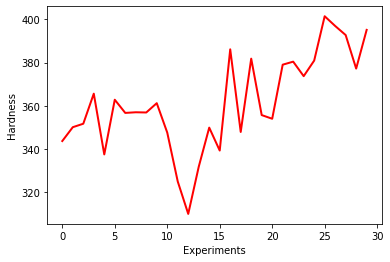

In [0]:
plt.plot(df.index, df['Hardness'], color='r', lw=2)
plt.xlabel('Experiments')
plt.ylabel('Hardness')
plt.show()

# Preparation of the data for training

In [0]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("Hardness")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
S-temp,24.0,1000.000000,83.405766,900.0,900.0,1000.0,1100.0,1100.0
S-time,24.0,6.666667,2.407717,5.0,5.0,5.0,10.0,10.0
Wel-power,24.0,1733.333333,209.899907,1500.0,1500.0,1700.0,2000.0,2000.0
Wel-speed,24.0,2.666667,0.481543,2.0,2.0,3.0,3.0,3.0


In [0]:
train_labels = train_dataset.pop('Hardness')
test_labels = test_dataset.pop('Hardness')

# Defining the function to normalize the data

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


# Defining the shallow neural network model

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

# Training and validation of the model

In [0]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:132885.9375,  mean_absolute_error:363.9622,  mean_squared_error:132885.9375,  val_loss:128701.4219,  val_mean_absolute_error:358.4697,  val_mean_squared_error:128701.4219,  
....................................................................................................
Epoch: 100, loss:116477.5156,  mean_absolute_error:340.8228,  mean_squared_error:116477.5156,  val_loss:115608.3359,  val_mean_absolute_error:339.7657,  val_mean_squared_error:115608.3359,  
....................................................................................................
Epoch: 200, loss:72492.5391,  mean_absolute_error:268.5466,  mean_squared_error:72492.5391,  val_loss:79240.3906,  val_mean_absolute_error:281.2160,  val_mean_squared_error:79240.3906,  
....................................................................................................
Epoch: 300, loss:18630.6055,  mean_absolute_error:129.9423,  mean_squared_error:18630.6055,  val_loss:28750.4062,  val_mean_absol

# Learning and validation results

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,197.965622,9.694552,197.965622,329.887146,14.018402,329.887146,995
996,197.979752,9.592797,197.979752,296.591034,12.568866,296.591034,996
997,197.965530,9.694547,197.965530,329.888611,14.018402,329.888611,997
998,197.979614,9.592788,197.979614,296.591522,12.568878,296.591522,998
999,197.965439,9.694537,197.965439,329.886566,14.018347,329.886566,999


# Plotting the results

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=3)

Text(0, 0.5, 'MAE [Hardness]')

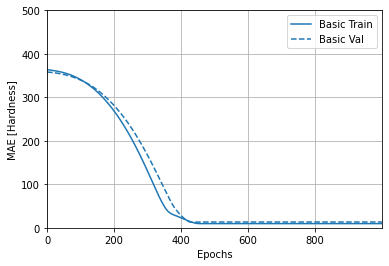

In [0]:
plotter.plot({'Basic': history}, metric = 'mean_absolute_error')
plt.ylim([0, 500])
plt.ylabel('MAE [Hardness]')   #mean_absolute_error

Text(0, 0.5, 'MSE [Hardness]')

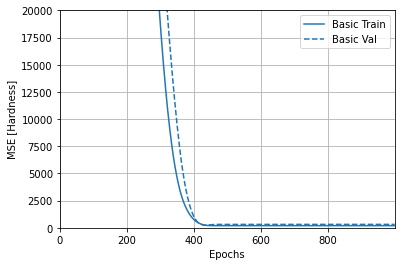

In [0]:
plotter.plot({'Basic': history}, metric = 'mean_squared_error')
plt.ylim([0, 20000])
plt.ylabel('MSE [Hardness]') #mean_squared_error

# Model with early stopping

In [0]:
model1 = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model1.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:133007.0781,  mean_absolute_error:364.1216,  mean_squared_error:133007.0781,  val_loss:128661.0234,  val_mean_absolute_error:358.4083,  val_mean_squared_error:128661.0234,  
....................................................................................................
Epoch: 100, loss:120571.7344,  mean_absolute_error:346.7631,  mean_squared_error:120571.7344,  val_loss:118872.3359,  val_mean_absolute_error:344.5028,  val_mean_squared_error:118872.3359,  
....................................................................................................
Epoch: 200, loss:85280.5625,  mean_absolute_error:291.5608,  mean_squared_error:85280.5625,  val_loss:91358.3672,  val_mean_absolute_error:302.0356,  val_mean_squared_error:91358.3672,  
....................................................................................................
Epoch: 300, loss:34860.1289,  mean_absolute_error:183.1239,  mean_squared_error:34860.1289,  val_loss:48116.2578,  val_mean_absol

# Results of the model with early stopping

Text(0, 0.5, 'MAE [Hardness]')

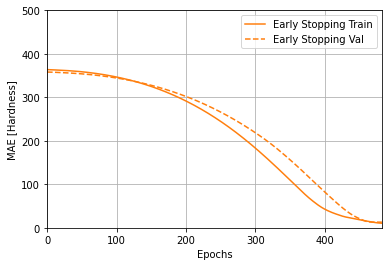

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mean_absolute_error")
plt.ylim([0, 500])
plt.ylabel('MAE [Hardness]') #mean_absolute_error

Text(0, 0.5, 'MSE [Hardness]')

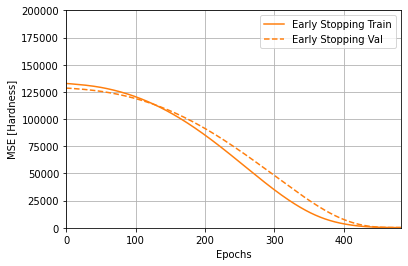

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mean_squared_error")
plt.ylim([0, 200000])
plt.ylabel('MSE [Hardness]') #mean_squared_error

# Training loss

In [0]:
loss, mae, mse = model1.evaluate(normed_train_data, train_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Hardness".format(mae))

24/24 - 0s - loss: 215.4005 - mean_absolute_error: 10.6634 - mean_squared_error: 215.4005
Testing set Mean Abs Error: 10.66 Hardness


# Test loss

In [0]:
loss, mae, mse = model1.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Hardness".format(mae))


6/6 - 0s - loss: 405.5491 - mean_absolute_error: 16.0223 - mean_squared_error: 405.5491
Testing set Mean Abs Error: 16.02 Hardness


# Training plot

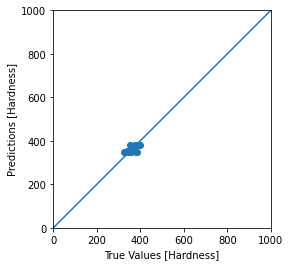

In [0]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [Hardness]')
plt.ylabel('Predictions [Hardness]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Test plot

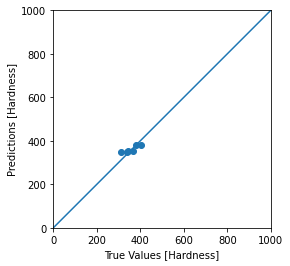

In [0]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Hardness]')
plt.ylabel('Predictions [Hardness]')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [0]:
test_predictions 

array([351.68796, 351.68796, 350.56686, 350.56686, 381.46933, 381.46933],
      dtype=float32)

# Corralation coefficient

In [0]:
t=np.corrcoef(test_labels, test_predictions)[0,1]
k=np.corrcoef(train_labels, train_predictions)[0,1]
print('the corralation on the training set is',t,'and that on the test set is',k)

the corralation on the training set is 0.8202124640414906 and that on the test set is 0.6679073160309644


# Percentage Errors on the predictions

The percentage error is defined as follows:

$$PE= 100\times \Big| \dfrac{TV-PV}{TV}\Big |$$

Where $TV$, $PV$ are the true values and the predicted value respectively.

In [0]:
error1 = 100*(np.abs(test_predictions - test_labels))/test_labels
error2=100*(np.abs(train_predictions - train_labels))/train_labels

In [0]:
error1

0      2.324108
3      3.805263
12    13.086085
15     3.320620
21     0.651538
25     4.965289
Name: Hardness, dtype: float64

In [0]:
error2

2     0.003424
28    1.131848
13    5.656077
10    0.853528
26    3.887798
24    0.149470
27    2.859860
11    7.866727
17    0.766561
22    0.281107
5     3.062856
16    9.203091
8     1.460365
14    0.190587
23    2.079029
20    7.759698
1     0.453573
29    3.449929
6     1.405114
4     4.203839
18    8.180497
19    1.443108
9     2.633456
7     1.487967
Name: Hardness, dtype: float64

In [0]:
test_predictions

array([351.68796, 351.68796, 350.56686, 350.56686, 381.46933, 381.46933],
      dtype=float32)

# Model with regularization